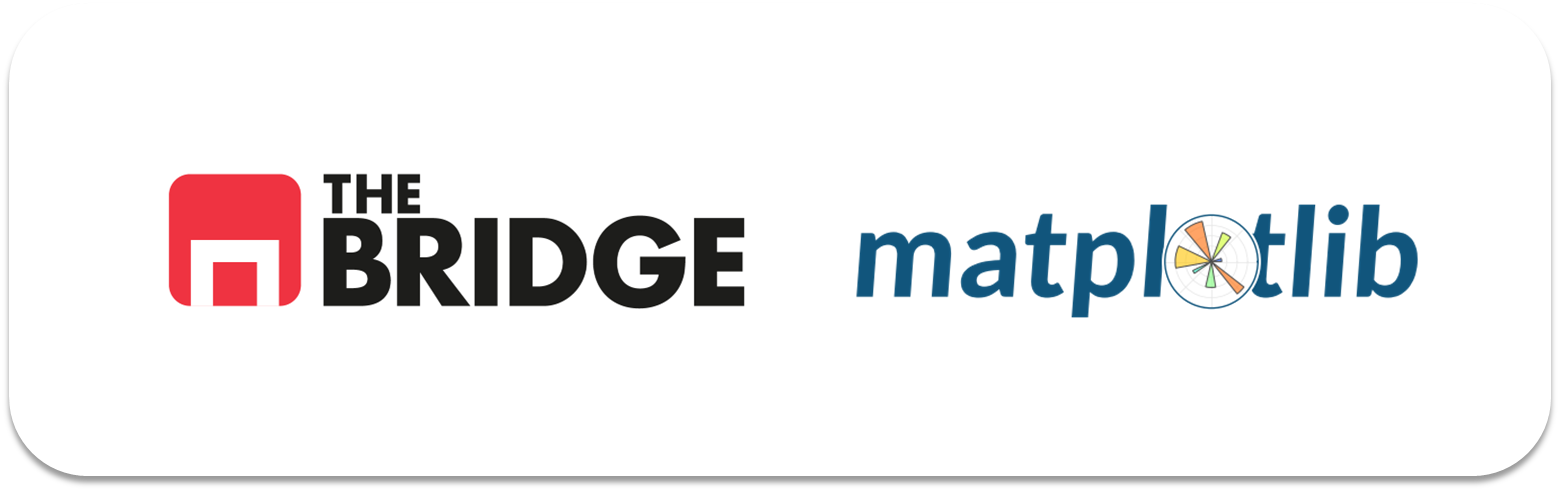

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [62]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.font_manager.findfont("Bradley Hand ITC")
import numpy as np
import pandas as pd

findfont: Font family ['Bradley Hand ITC'] not found. Falling back to DejaVu Sans.


## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [4]:
df = pd.read_csv("./data/california_cities.csv")
print(df.head())


   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water_km2  area_water_p

In [5]:
print(df.describe())

       Unnamed: 0        latd       longd  elevation_m  elevation_ft  \
count  482.000000  482.000000  482.000000   434.000000    470.000000   
mean   240.500000   36.095088 -119.837714   180.416705    567.168723   
std    139.285678    2.298006    2.147676   309.531825   1001.265722   
min      0.000000   32.578333 -124.263333   -34.000000   -180.000000   
25%    120.250000   33.977292 -121.954931    22.000000     69.000000   
50%    240.500000   36.204722 -119.708611    67.000000    200.000000   
75%    360.750000   37.886667 -117.977292   173.500000    515.000000   
max    481.000000   41.965000 -114.596389  2402.000000   7880.000000   

       population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
count      4.820000e+02        480.000000       482.000000        481.000000   
mean       6.489493e+04         18.442183        16.840981          1.589630   
std        2.032041e+05         36.363230        32.694647          9.490386   
min        1.000000e+00        

In [7]:
df.dropna(inplace=True)

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

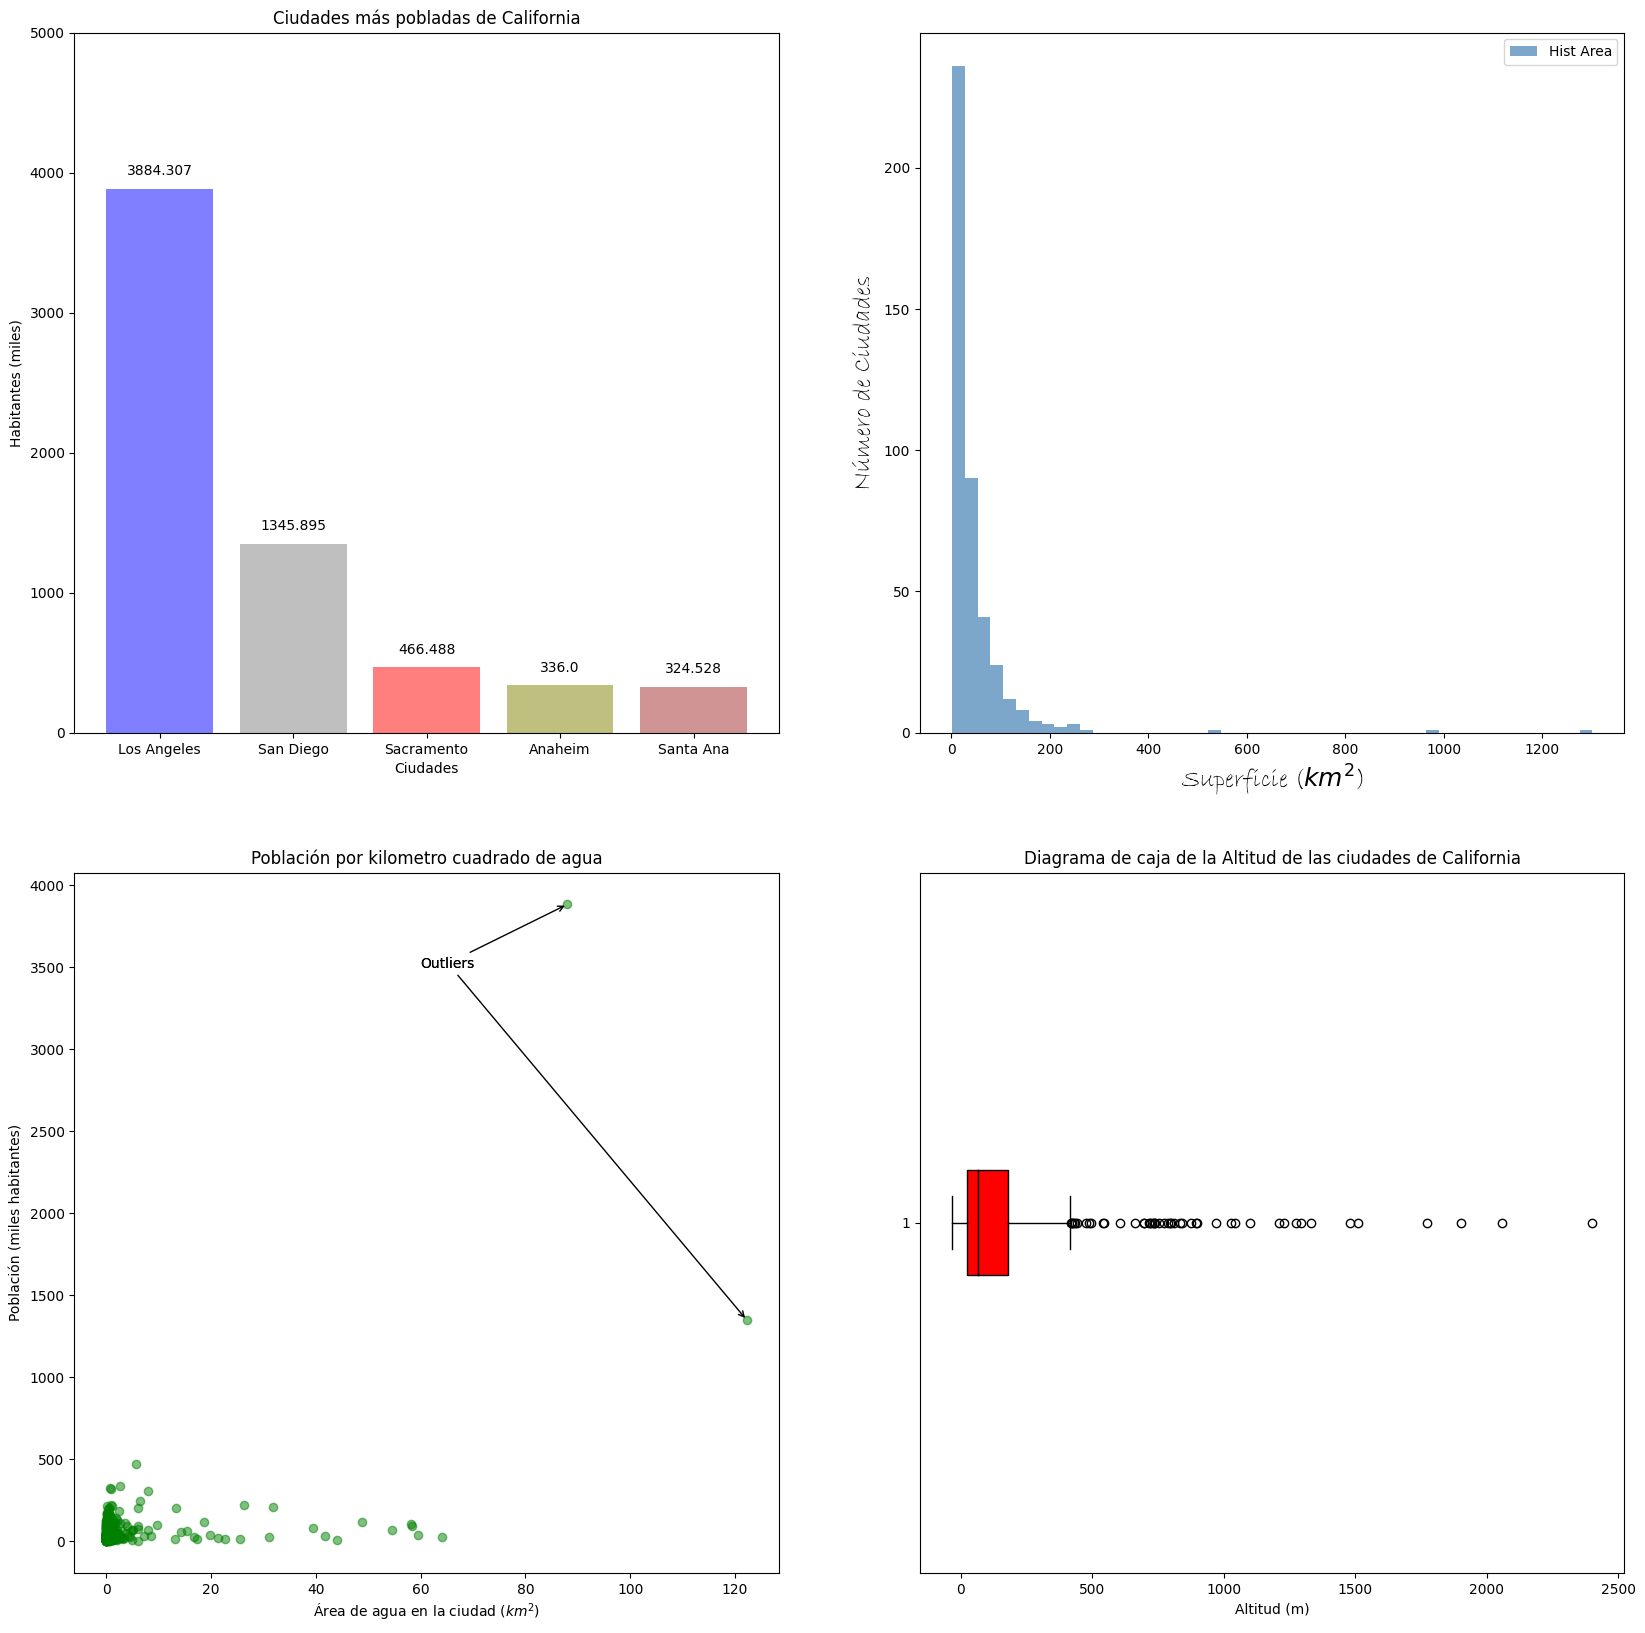

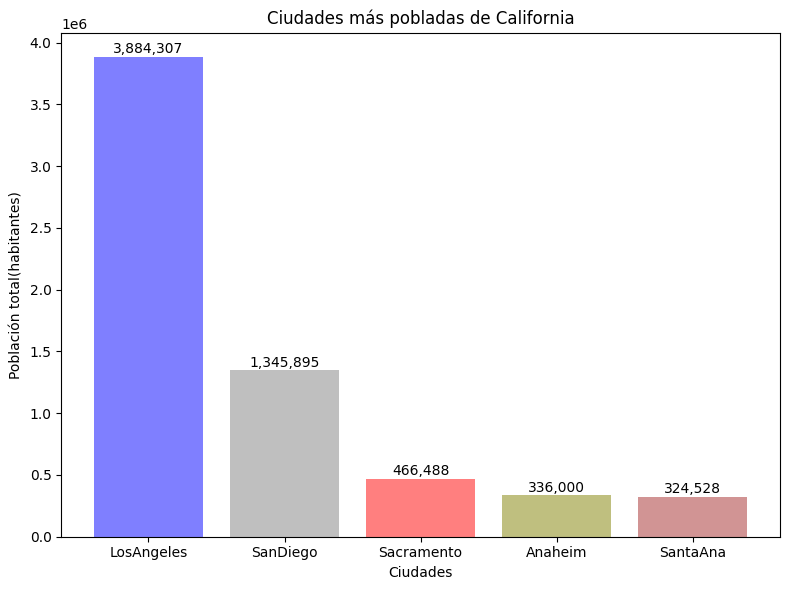

In [75]:
#1. Barras con las ciudades más pobladas (etiquetas centradas)
top5 = df.sort_values(by="population_total", ascending=False).head(5)

colores = ["blue", "gray", "red", "olive", "brown"]

plt.figure(figsize=(8,6))

plt.bar(top5["city"], top5["population_total"], color= colores, alpha=0.5)

for i in range(len(top5)):
    plt.text(i, top5["population_total"].iloc[i] + 30000,
             f'{top5["population_total"].iloc[i]:,}',
             ha='center', color='black')


    
plt.title("Ciudades más pobladas de California")
plt.ylabel("Población total(habitantes)")
plt.xlabel("Ciudades")

plt.tight_layout()
plt.show()

findfont: Font family 'Bradley Hand ITC' not found.
findfont: Font family 'Bradley Hand ITC' not found.


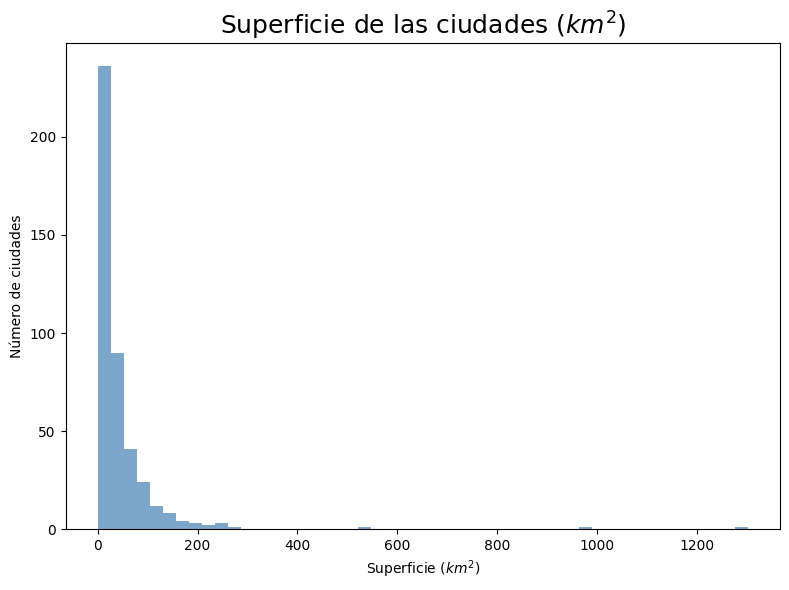

: 

In [ ]:
#2. Histograma del área total ocupada por las ciudades (50 bins, fuente = 'Bradley Hand ITC", tamaño 18, color azule acero)

plt.figure(figsize=(8,6))

plt.hist(df["area_total_km2"], bins=50, color="steelblue", alpha=0.7, label ="Hist Area")

plt.title("Superficie de las ciudades ($km^2$)", fontname="Bradley Hand ITC", fontsize=18)
plt.xlabel("Superficie ($km^2$)")
plt.ylabel("Número de ciudades")

plt.tight_layout()
plt.show()

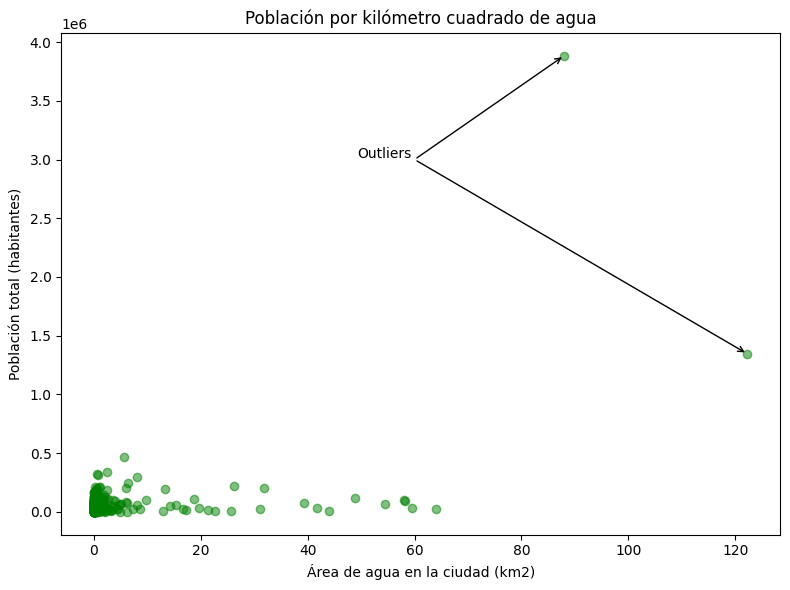

In [ ]:
#3.Scatter del área del agua de una ciudad con su población
plt.figure(figsize=(8,6))

plt.scatter(
    df["area_water_km2"],
    df["population_total"],
    alpha=0.5,
    color="green"
)

outlier = df[df["population_total"] == df["population_total"].max()]
x = outlier["area_water_km2"].values[0]
y = outlier["population_total"].values[0]

outlier_agua = df[df["area_water_km2"] == df["area_water_km2"].max()]
x2 = outlier_agua["area_water_km2"].values[0]
y2 = outlier_agua["population_total"].values[0]

plt.annotate(
    "Outliers",
    xy=(0.45,0.75),
    xycoords='axes fraction',
    ha="center",
    fontsize=10
)

plt.annotate("",
    xy=(x,y),
    xytext=(60,3000000),
    arrowprops=dict(arrowstyle="->", color="black"),
)
plt.annotate("",
    xy=(x2,y2),
    xytext=(60,3000000),
    arrowprops=dict(arrowstyle="->", color="black"),
)

plt.title("Población por kilómetro cuadrado de agua")
plt.xlabel("Área de agua en la ciudad (km2)")
plt.ylabel("Población total (habitantes)")

plt.tight_layout()
plt.show()


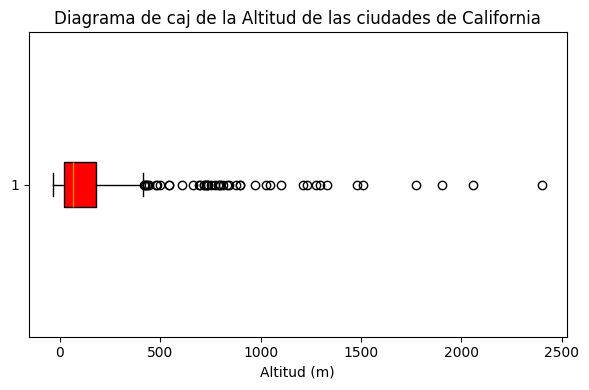

In [ ]:
#4. Boxplot altitud
plt.figure(figsize=(6,4))

plt.boxplot(df["elevation_m"], vert=False, patch_artist=True,
            boxprops=dict(facecolor='red'))

plt.title("Diagrama de caj de la Altitud de las ciudades de California")
plt.xlabel("Altitud (m)")

plt.tight_layout()
plt.show()

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

C:\Users\sanlo\AppData\Local\Temp\ipykernel_5888\248050229.py:74: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


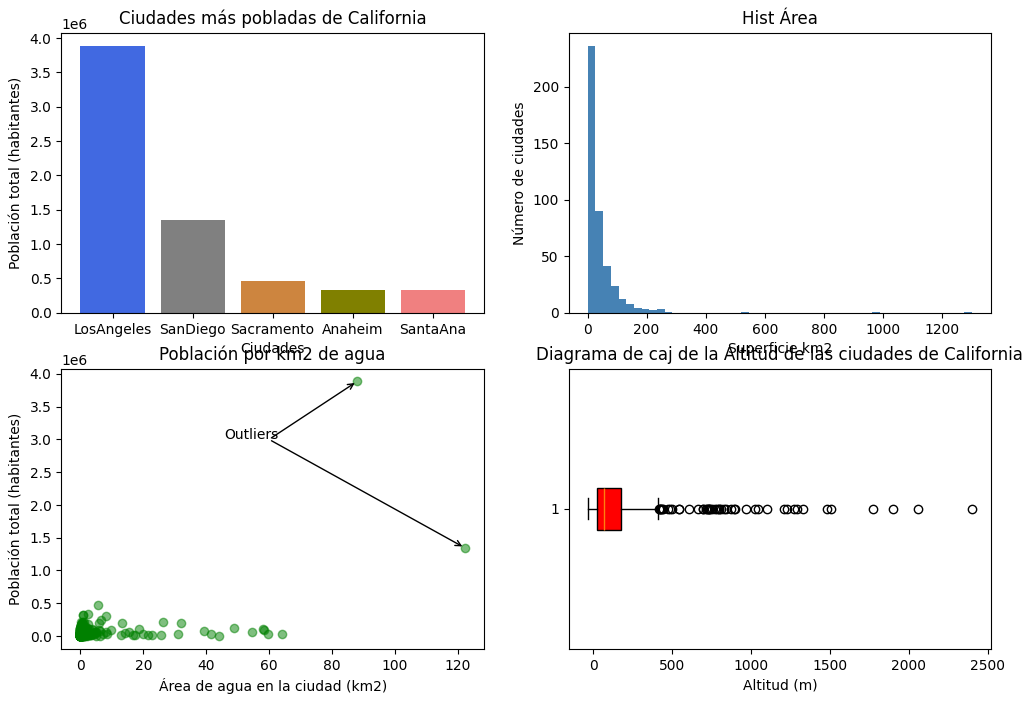

ValueError: Image size of 2563x1808409888 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 800x600 with 1 Axes>

In [60]:
fig, axs = plt.subplots(2,2, figsize=(12,8))

#1. Barras con las ciudades más pobladas (etiquetas centradas)
top5 = df.sort_values(by="population_total", ascending=False).head(5)

colores = ["royalblue", "gray", "peru", "olive", "lightcoral"]

plt.figure(figsize=(8,6))

axs[0,0].bar(top5["city"], top5["population_total"], color= colores)

for i in range(len(top5)):
    plt.text(i, top5["population_total"].iloc[i] + 30000,
             f'{top5["population_total"].iloc[i]:,}',
             ha='center', color='black')

axs[0, 0].set_title("Ciudades más pobladas de California")
axs[0, 0].set_ylabel("Población total (habitantes)")
axs[0, 0].set_xlabel("Ciudades")

#2. Histograma del área total ocupada por las ciudades (50 bins, fuente = 'Bradley Hand ITC", tamaño 18, color azule acero)
axs[0, 1].hist(df["area_total_km2"], bins=50, color="steelblue")
axs[0, 1].set_title("Hist Área")
axs[0, 1].set_xlabel("Superficie km2")
axs[0, 1].set_ylabel("Número de ciudades")

#3 Dispersión con outliers

axs[1, 0].scatter(
    df["area_water_km2"],
    df["population_total"],
    alpha=0.5,
    color="green"
)

outlier = df[df["population_total"] == df["population_total"].max()]
x = outlier["area_water_km2"].values[0]
y = outlier["population_total"].values[0]

outlier_agua = df[df["area_water_km2"] == df["area_water_km2"].max()]
x2 = outlier_agua["area_water_km2"].values[0]
y2 = outlier_agua["population_total"].values[0]

axs[1, 0].annotate(
    "Outliers",
    xy=(0.45,0.75),
    xycoords='axes fraction',
    ha="center",
    fontsize=10
)

axs[1, 0].annotate("",
    xy=(x,y),
    xytext=(60,3000000),
    arrowprops=dict(arrowstyle="->", color="black"),
)
axs[1, 0].annotate("",
    xy=(x2,y2),
    xytext=(60,3000000),
    arrowprops=dict(arrowstyle="->", color="black"),
)

axs[1, 0].set_title("Población por km2 de agua")
axs[1, 0].set_xlabel("Área de agua en la ciudad (km2)")
axs[1, 0].set_ylabel("Población total (habitantes)")

#4. Boxplot altitud
axs[1, 1].boxplot(df["elevation_m"], vert=False, patch_artist=True,
            boxprops=dict(facecolor='red'))

axs[1, 1].set_title("Diagrama de caj de la Altitud de las ciudades de California")
axs[1, 1].set_xlabel("Altitud (m)")

plt.tight_layout()
fig.savefig("./data/grafico_california.png", dpi=300)
plt.show()